In [1]:
import pandas as pd
import os 
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [ ]:
os.getcwd()

In [3]:
#Combining all the years together 
# data came from here - https://pge-energydatarequest.com/public_datasets/download?type=electric&file=PGE_2021_Q4_ElectricUsageByZip.zip
# Create an empty list to store the dataframes
current_dir = os.getcwd()
df_list = []

# Loop through each CSV file in the directory
for filename in os.listdir(current_dir):
    if filename.endswith('.csv'):
        # Read the CSV file and append it to the list of dataframes
        file_path = os.path.join(current_dir, filename)
        df = pd.read_csv(file_path)
        df.columns = df.columns.str.lower()
        #df['Quarter']=filename[9:11]
        df_list.append(df)

# Concatenate all dataframes in the list into a single dataframe
df_years = pd.concat(df_list, ignore_index=True)

## Explore Data

In [ ]:
df_years

In [ ]:
df_years.info()

In [4]:
df_years['totalcustomers']=df_years['totalcustomers'].str.replace(',','')
df_years['totalkwh']=df_years['totalkwh'].str.replace(',','')
df_years['averagekwh']=df_years['averagekwh'].str.replace(',','')

In [5]:
df_years['totalcustomers']=df_years['totalcustomers'].astype(int)
df_years['totalkwh']=df_years['totalkwh'].astype(float)
df_years['averagekwh']=df_years['averagekwh'].astype(float)

In [ ]:
df_years.describe()

In [ ]:
df_years['combined'].value_counts(normalize=True)*100 # 65% of our data belongs to combines zip codes

In [ ]:
df_years[((df_years['combined']=='Y') & (df_years['totalcustomers']!=0) & (df_years['totalkwh']!=0))]
# ok so for combined zip codes we also have data on customers

In [ ]:
len(df_years[((df_years['combined']=='Y') & (df_years['totalcustomers']==0) & (df_years['totalkwh']==0))])
# this may indicate zip codes where PGE does not have any customers or maybe 0s means somethings else


In [ ]:
len(df_years[((df_years['combined']=='Y') & (df_years['totalcustomers']==0) & (df_years['totalkwh']==0)& (df_years['averagekwh'].isnull()))])
# so wo all these obs averagekwh is missing too
# lets drop them 

In [ ]:
len(df_years[((df_years['combined']=='Y') & (df_years['totalcustomers']==0) & (df_years['totalkwh']==0)& (df_years['averagekwh'].isnull()))])


In [6]:
mask=(df_years['combined']=='Y') & (df_years['totalcustomers']==0) & (df_years['totalkwh']==0) & (df_years['averagekwh'].isnull())


In [7]:
#df_years=df_years[~((df_years['combined']=='Y') & (df_years['totalcustomers']==0) & (df_years['totalkwh']==0) & (df_years['averagekwh'].isnull))]
#df_years[((df_years['combined']=='Y') & (df_years['totalcustomers']==0) & (df_years['totalkwh']==0))]
df_years=df_years[~mask]

In [8]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh
10,93206,2,2013,Elec- Agricultural,Y,138,7249627.0,52534.0
11,93206,3,2013,Elec- Agricultural,Y,371,20354832.0,54865.0
16,93212,2,2013,Elec- Agricultural,Y,213,9971956.0,46817.0
28,93230,2,2013,Elec- Agricultural,Y,244,3942702.0,16159.0
46,93245,2,2013,Elec- Agricultural,N,334,1008626.0,3020.0
...,...,...,...,...,...,...,...,...
304593,96125,11,2021,Elec- Residential,N,441,99843.0,226.0
304594,96125,12,2021,Elec- Residential,N,441,103069.0,234.0
304595,96137,10,2021,Elec- Residential,N,2791,972348.0,348.0
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0


In [9]:
#determine duplicates
df_years.duplicated().any()

True

In [ ]:
df_years.duplicated().sum()

In [ ]:
df_years[df_years.duplicated()]

In [10]:
df_years=df_years.drop_duplicates()

In [ ]:
df_years

In [11]:
df_years['customerclass'].value_counts() # 4 classess

Elec- Residential     90185
Elec- Commercial      38352
Elec- Agricultural     8004
Elec- Industrial        805
Name: customerclass, dtype: int64

In [12]:
ohe = pd.get_dummies(df_years['customerclass'], drop_first=True) # we create n-1 dummies

In [13]:
# Drops categorical variables from the df
#df_years = df_years.drop('customerclass', axis = 1) 

# Adds the newly created dummy variables instead
df_years = pd.concat([df_years, ohe], axis = 1) 

In [14]:
df_years

,zipcode,month,year,customerclass,combined,totalcustomers,totalkwh,averagekwh,Elec- Commercial,Elec- Industrial,Elec- Residential
10,93206,2,2013,Elec- Agricultural,Y,138,7249627.0,52534.0,0,0,0
11,93206,3,2013,Elec- Agricultural,Y,371,20354832.0,54865.0,0,0,0
16,93212,2,2013,Elec- Agricultural,Y,213,9971956.0,46817.0,0,0,0
28,93230,2,2013,Elec- Agricultural,Y,244,3942702.0,16159.0,0,0,0
46,93245,2,2013,Elec- Agricultural,N,334,1008626.0,3020.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
304593,96125,11,2021,Elec- Residential,N,441,99843.0,226.0,0,0,1
304594,96125,12,2021,Elec- Residential,N,441,103069.0,234.0,0,0,1
304595,96137,10,2021,Elec- Residential,N,2791,972348.0,348.0,0,0,1
304596,96137,11,2021,Elec- Residential,N,2790,973018.0,349.0,0,0,1


In [15]:
#determine if there is missing values
df_years.isna().any()

zipcode              False
month                False
year                 False
customerclass        False
combined             False
totalcustomers       False
totalkwh             False
averagekwh           False
Elec- Commercial     False
Elec- Industrial     False
Elec- Residential    False
dtype: bool

In [ ]:
df_years.isna().mean()*100 # percentage of missing values for average killo wat per hour

In [16]:
df_years['customers_type_year']=df_years.groupby(['year','customerclass'])['totalcustomers'].transform('mean') # average number of customers per year

In [17]:
df_years['customers_type_year_zip']=df_years.groupby(['year','customerclass','zipcode'])['totalcustomers'].transform('mean') # average number of customers per year for each zip code

In [30]:
df_years[(df_years['zipcode']==94538) & (df_years['year']==2015)]['month'].value_counts()
#df_years Q3 looks suspicious

1     2
2     2
3     2
4     2
5     2
6     2
7     2
8     2
9     2
10    2
11    2
12    2
Name: month, dtype: int64

In [ ]:
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014)& (df_years['month']>=10)]


In [ ]:
df_years[(df_years['zipcode']==94538) & (df_years['year']==2014) & (df_years['Quarter']=='Q3')]


In [19]:
df_years['zipcode'].nunique() # we have lots of zip codes here


827

In [ ]:
df_years['totalcustomers_year']=

In [ ]:
df_years['totalcustomers'].hist(bins=50)

In [24]:
df_res=df_years[df_years['customerclass']=='Elec- Residential']

In [27]:
import matplotlib.pyplot as plt

In [32]:
df_years['customerclass'].unique()

array(['Elec- Agricultural', 'Elec- Commercial', 'Elec- Industrial',
       'Elec- Residential'], dtype=object)

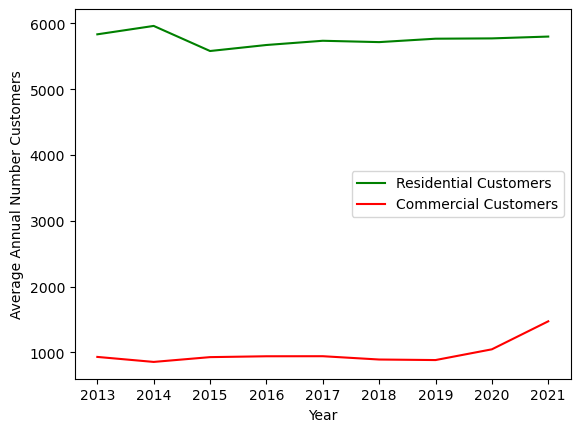

In [35]:
plt.plot(df_res['year'], df_res['customers_type_year'], label='Residential Customers',color='green')


plt.plot(df_years[df_years['customerclass']=='Elec- Commercial']['year'], df_years[df_years['customerclass']=='Elec- Commercial']['customers_type_year'],
        label='Commercial Customers',color='red')

plt.xlabel('Year')
plt.ylabel('Average Annual Number Customers')
plt.legend()
#df_res.groupby('year')['customers_type_year'].plot(kind='hist', alpha=0.5, legend=True)
